In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
batting=pd.read_csv("./../Data/stats_batting_2.csv")
bowling=pd.read_csv("./../Data/stats_bowling_1.csv")

batting.head()
# bowling.head()

,player_name,runs_scored,balls_faced,times_out,batting_avg,strike_rate
0,A Ashish Reddy,280,193,15,18.67,145.08
1,A Chopra,53,71,6,8.83,74.65
2,A Choudhary,25,20,1,25.00,125.00
3,A Flintoff,62,53,2,31.00,116.98
4,A Kumble,35,47,3,11.67,74.47


In [3]:
batting.dropna(inplace=True)
bowling.dropna(inplace=True)

In [4]:
#we thought of taking only batting avg and strike rate for clustering but
#the guy who faced 1 ball and hit 1 run also belongs to top batsmans cluster so we are considering all
FEATURES_COL=["runs_scored","balls_faced","times_out","batting_avg","strike_rate"]
FEATURES_COL_BOWL=["runs_conceded","wickets_taken","overs_bowled","bowling_average","economy_rate","bowling_strike_rate"]

In [5]:
batting[FEATURES_COL] = batting[FEATURES_COL].astype(float)
bowling[FEATURES_COL_BOWL]=bowling[FEATURES_COL_BOWL].astype(float)

In [6]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(batting[FEATURES_COL])
batting["cluster"] = kmeans.labels_

kmeans = KMeans(n_clusters=7)
kmeans.fit(bowling[FEATURES_COL_BOWL])
bowling["cluster"] = kmeans.labels_

In [7]:
batting[batting['cluster']==4]

,player_name,runs_scored,balls_faced,times_out,batting_avg,strike_rate,cluster
71,BJ Hodge,1400.0,1118.0,42.0,33.33,125.22,4
106,DJ Bravo,1403.0,1090.0,59.0,23.78,128.72,4
109,DJ Hussey,1322.0,1075.0,49.0,26.98,122.98,4
132,F du Plessis,1457.0,1141.0,48.0,30.35,127.70,4
141,GJ Maxwell,1397.0,867.0,61.0,22.90,161.13,4
155,IK Pathan,1139.0,946.0,53.0,21.49,120.40,4
200,KK Nair,1459.0,1133.0,58.0,25.16,128.77,4
201,KL Rahul,1384.0,993.0,36.0,38.44,139.38,4
205,KS Williamson,1146.0,834.0,27.0,42.44,137.41,4
218,LMP Simmons,1079.0,852.0,27.0,39.96,126.64,4


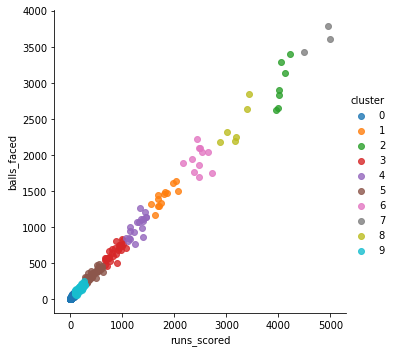

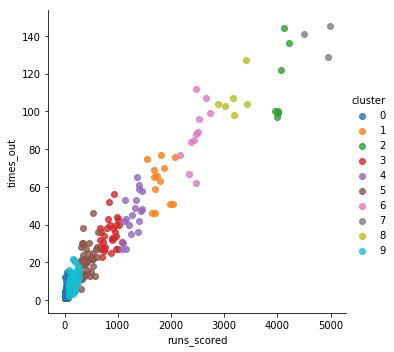

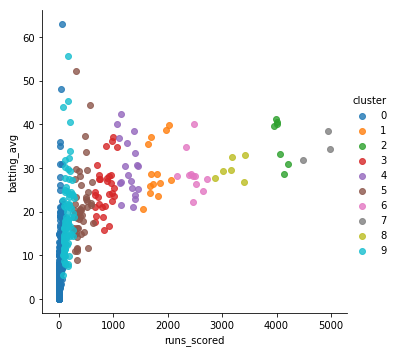

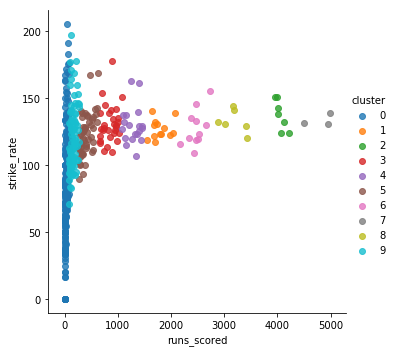

In [8]:
facet = sns.lmplot(data=batting, x='runs_scored', y='balls_faced', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='times_out', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='batting_avg', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='strike_rate', hue='cluster', fit_reg=False, legend=True, legend_out=True)

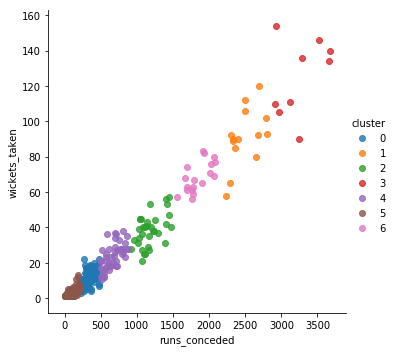

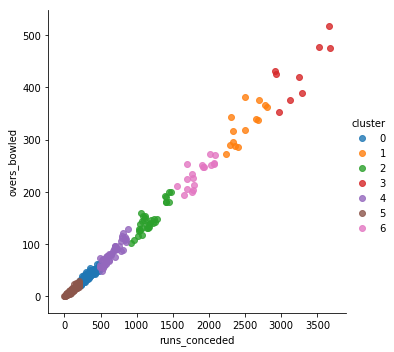

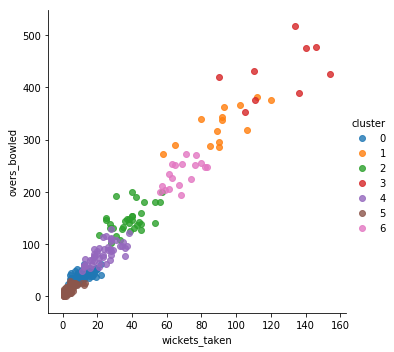

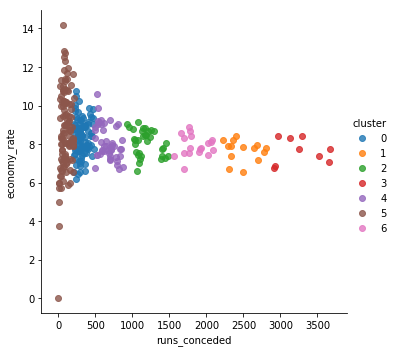

In [9]:
facet = sns.lmplot(data=bowling, x="runs_conceded", y='wickets_taken', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='runs_conceded', y='overs_bowled', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='wickets_taken', y='overs_bowled', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='runs_conceded', y='economy_rate', hue='cluster', fit_reg=False, legend=True, legend_out=True)

In [10]:
batting_cluster=batting[['player_name','cluster']]
bowling_cluster=bowling[['player_name','cluster']]

In [15]:
batting_cluster.to_csv("./../Data/batting_cluster.csv",index=None)
bowling_cluster.to_csv("./../Data/bowling_cluster.csv",index=None)